refer source: [Visualizing and Animating Optimization Algorithms with Matplotlib](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/) 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions. 

The Wikipedia article on [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at **Beale's function**:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [3]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [4]:
xmin, xmax, xstep = 2.5, 4.5, .2
ymin, ymax, ystep = -1, 1, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [5]:
minima = np.array([3., .5])
f(*minima)

0.0

In [6]:
minima_ = minima.reshape(-1, 1)
minima_
f(*minima_)

array([0.])

In [7]:
func = value_and_grad(lambda args: f(*args))

In [8]:
def backtracking_line(f,x,grad_f,t=0.01,verbose=False):
    a=1/2
    b=1/2
    
    if verbose:
        print('g '+str(grad_f))
        print(f(x-t*grad_f)[0])
        print(a*t*np.dot(np.transpose(grad_f),grad_f))
    while f(x-t*grad_f)[0]>f(x)[0]-a*t*np.dot(np.transpose(grad_f),grad_f):
        t=b*t
    #x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return t

[[ 3.31014714]
 [-2.07537357]]


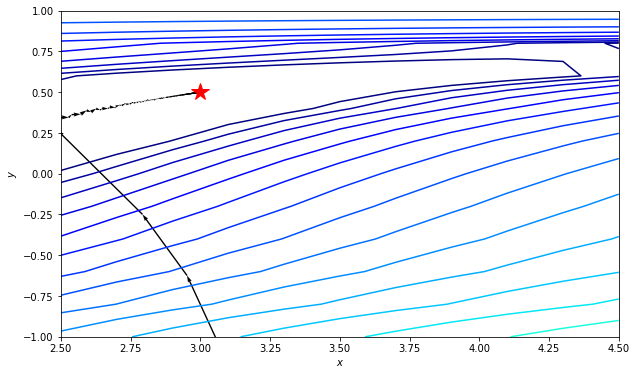

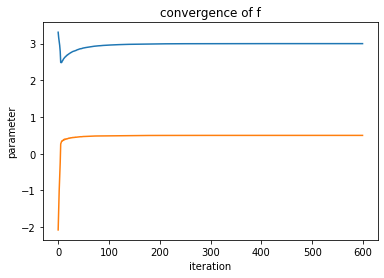

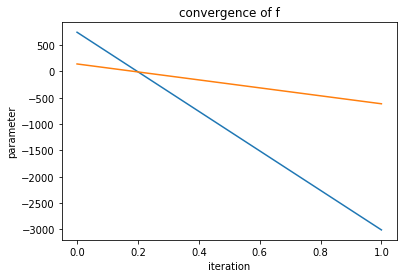

In [9]:
for i in range(1):
    step=0
    learning_rate=0.00001
    grad=np.ones([2,1])
    path_=[]
    grads=[]
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#

    print(init)

    while(step<600 and (len(grad[abs(grad)>1e-6])>0)) :
        path_.append(init)
        
        zv,grad=func(init)
        grads.append(grad)
        learning_rate=backtracking_line(f=func,x=init,grad_f=grad,t=0.1,verbose=False)
        # if step%100==0:
        #     pass
        #     print(learning_rate)
        init=init-learning_rate*grad
        step+=1

    path=np.array(path_).T
    path=path[0]

    # plot
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    plt.show()
    plt.plot(path[0])
    plt.plot(path[1])
    plt.title('convergence of f')
    plt.ylabel('parameter')
    plt.xlabel('iteration')

    plt.show()
    plt.plot(grads[0])
    plt.plot(grads[1])
    plt.title('convergence of f')
    plt.ylabel('parameter')
    plt.xlabel('iteration')

    plt.show()

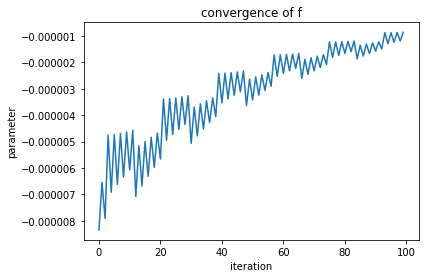

In [10]:
    plt.plot(np.transpose(grads)[0][0][-100:])
    # plt.plot(grads[1])
    plt.title('convergence of f')
    plt.ylabel('parameter')
    plt.xlabel('iteration')

    plt.show()

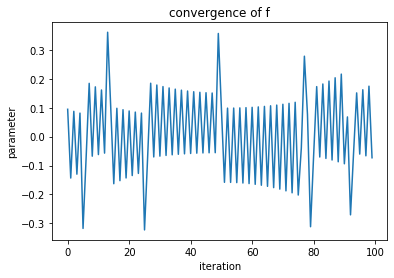

In [151]:
    plt.plot(np.transpose(grads)[0][1][-100:])
    plt.plot(np.transpose(grads)[0][1][-100:])
    # plt.plot(grads[1])
    plt.title('convergence of f')
    plt.ylabel('parameter')
    plt.xlabel('iteration')

    plt.show()

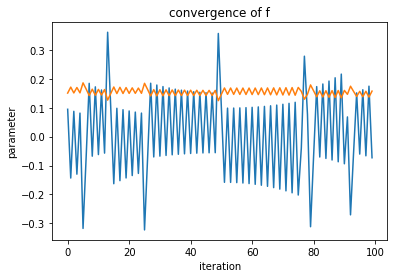

In [153]:
    plt.plot(np.transpose(grads)[0][1][-100:])
    plt.plot(np.transpose(grads)[0][0][-100:])
    # plt.plot(grads[1])
    plt.title('convergence of f')
    plt.ylabel('parameter')
    plt.xlabel('iteration')

    plt.show()

In [140]:
grad

array([[3.90468875e-05],
       [1.85544369e-05]])

[[0.07768413]
 [0.09541899]]
[[0.02189052]
 [0.01536897]]
[[-4.50400895e-06]
 [ 2.57877948e-06]]
[[-9.77991955e-05]
 [-5.18416462e-05]]
[[-0.6081329 ]
 [ 0.31154779]]
[[0.15228987]
 [0.10726913]]


[]

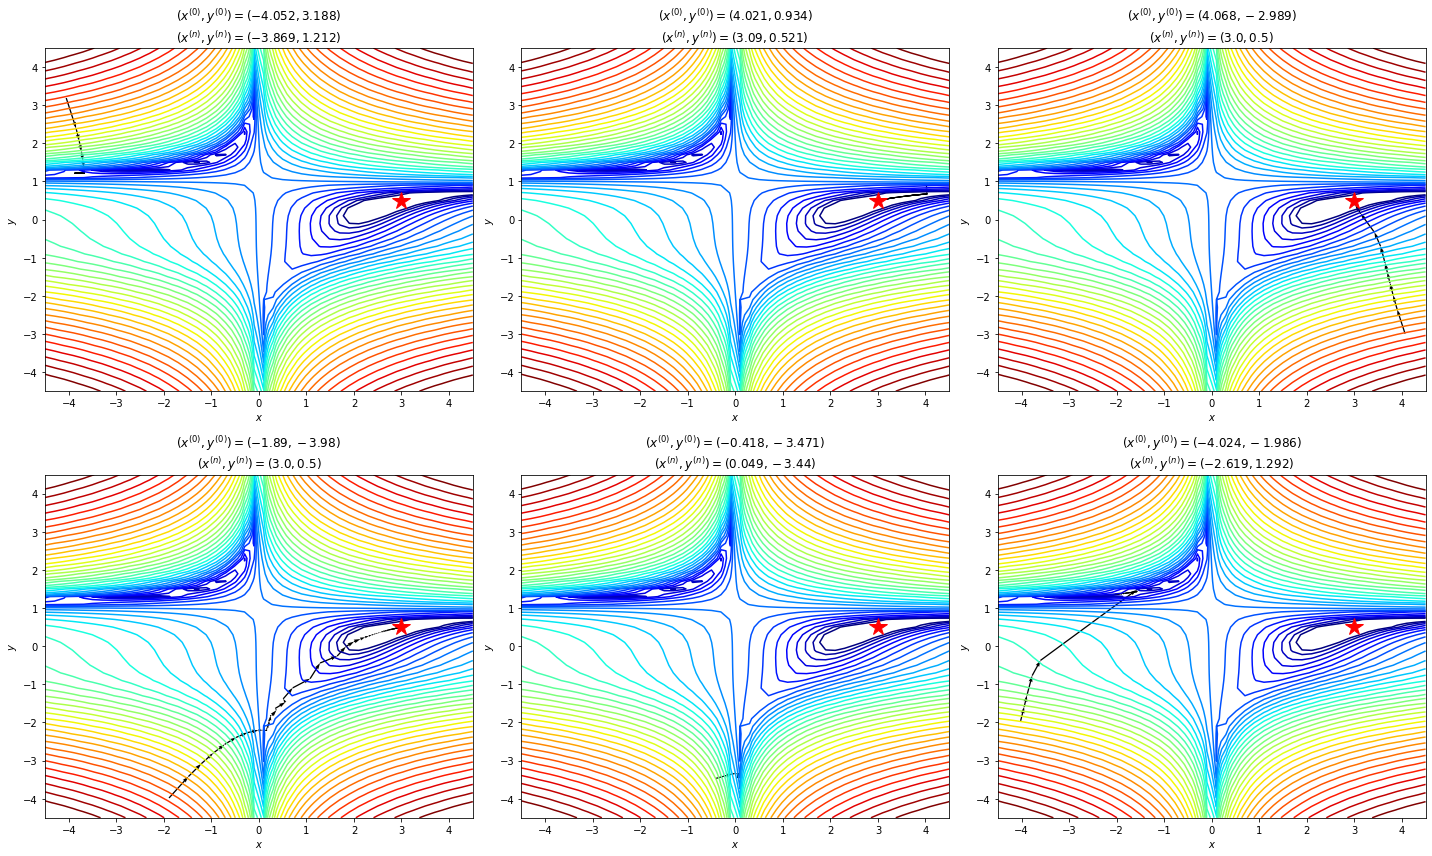

In [48]:
fig=plt.figure(figsize=(20,12))
for i in range(6):
    step=0
    # learning_rate=0.00001
    grad=np.ones([2,1])
    path_=[]
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#
    iterx=init
    while(step<400 and (len(grad[abs(grad)>1e-6])>0)) :
        path_.append(iterx)

        zv,grad=func(iterx)
        learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=0.1,verbose=False)
        # if step%100==0:
        #     pass
        #     print(learning_rate)
        iterx=iterx-learning_rate*grad
        step+=1
    print(grad)
    path=np.array(path_).T
    path=path[0]

    # plot
    ax = plt.subplot(2,3,i+1)#s(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.title('$(x^{(0)},y^{(0)})=('+str(np.round(init[0][0],3))+','+str(np.round(init[1][0],3))+')$\n$(x^{(n)},y^{(n)})=('+str(np.round(iterx[0][0],3))
+','+str(np.round(iterx[1][0],3))+')$')
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
plt.tight_layout()
plt.plot()

In [23]:
init[0][0]

2.9565202468115293

In [28]:
init[1][0]

0.489136840288977

In [29]:
np.round(init[0][0],3)
np.round(init[1][0],3)

0.489

[]

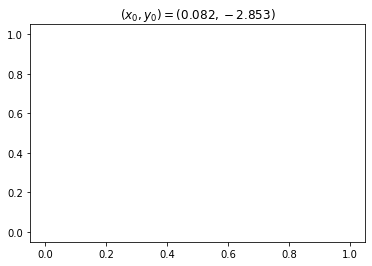

In [38]:
plt.title('$(x^{(0)},y^{(0)})=('+str(np.round(init[0][0],3))
+','+str(np.round(init[1][0],3))+')$')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

In [15]:
    def backtrack(f,iterx,grad,maxstep=400,t=0.1,verbose=False):
        path_=[]
        step=0
        while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):

            path_.append(iterx)

            zv,grad=func(iterx)
            learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
            # if step%100==0:
            #     pass
            #     print(learning_rate)
            iterx=iterx-learning_rate*grad
            if step>maxstep-10:
                print(learning_rate)
            step+=1
        print(grad)
        path=np.array(path_).T
        path=path[0]
        return path

0.00390625
0.0078125
0.00390625
0.015625
0.001953125
0.0078125
0.00390625
0.015625
0.00390625
[[ 0.27121566]
 [-0.32786894]]


[]

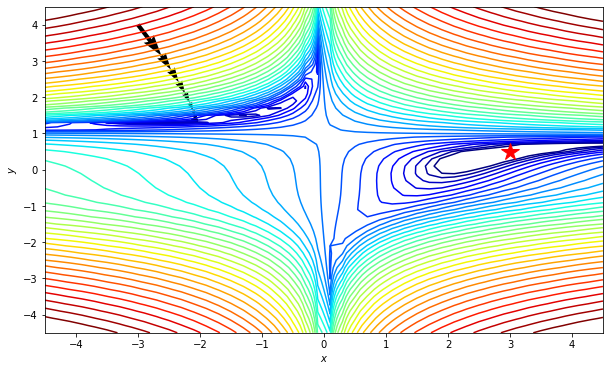

In [17]:
step=0
learning_rate=0.001
grad=np.ones([2,1])

init= np.array([[-3.],[4.]])#2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#

path=backtrack(f=func,iterx=init,grad=grad,maxstep=40,t=1,verbose=False)

# plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

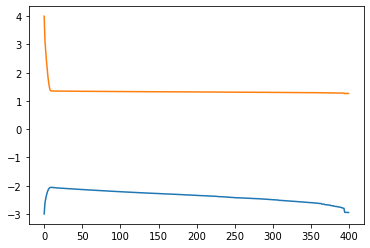

In [11]:
plt.plot(path[0])
plt.plot(path[1])

In [12]:
def skateStep(f,x,t=1,threshold=1e-2,maxStep=50,rate=2,verbose=False):
    '''
    Args:
    @f_x, function return value and gradient
    @df_dx, first order derivative of f_x
    @x, initial x
    @t, initial learing rate
    @threshold, transform to skate mode limit
    @maxStep, max iteration times
    '''
    skateMode=False
    finalMode=False
    step=0
    fv,grad=f(x)

    path_=[]
        
    
    while(step<maxStep and len(grad[abs(grad)>1e-6])>0) :
        fv,grad=f(x)
        path_.append(x)
        if skateMode==False:
            learning_rate=backtracking_line(f=f,x=x,grad_f=grad,t=t)
            x=x-learning_rate*grad
        if finalMode==False and skateMode==False and len(grad[abs(grad)<threshold])>1:
            # print(grad,x)
            skate=learning_rate*rate
            skateMode=True
            minVal=fv
            minSite=x
            minVal2=fv
            minSite2=x
        if skateMode==True:
            if verbose:
                print(grad)
                print(skate)
            # record min value and min site(and 2)
            if len(grad[abs(grad)<threshold])>1:
                x=x-skate*grad
                fv,grad=f(x)
                if verbose:
                    print('skate')
                    print(step)
                if fv<minVal:
                    if verbose:
                        print('less')
                    minVal=fv
                    minSite=x
                else:
                    if verbose:
                        print('here')
                    # return to last step
                    x=minSite
                    y=fv
                    x=(y/(minVal+y))*(minSite-x)+x
                    finalMode=True
                    skateMode=False
            else:
                if verbose:
                    print('saddle')
                skateMode=False

        if finalMode==True:
            learning_rate=backtracking_line(f=f,x=x,grad_f=grad,t=t)
            x=x-learning_rate*grad
        step+=1
    print(grad)
    print(step)
    path=np.array(path_).T
    path=path[0]

    print('*******************')
    print(fv)
    return path
    #return x,step

In [13]:
fooa=np.asarray([[2],[2]])
foob=np.asarray([[1],[2]])
fooa/(fooa+foob)

array([[0.66666667],
       [0.5       ]])

In [15]:
init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#

init=np.array([[2.8],[.4]])#

In [19]:
xmin, xmax, xstep = 2.8, 3.2, .002
ymin, ymax, ystep = 0.3, 0.7, .002
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

[[-0.00466876]
 [-0.01262847]]
100
*******************
[9.3434351e-05]


[]

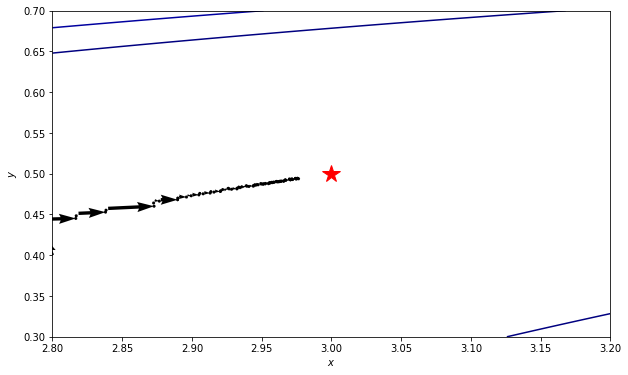

In [20]:
learning_rate=0.001
grad=np.ones([2,1])
path_=[]
for i in range(1,2):
    path=skateStep(f=func,x=init,t=1,threshold=1e-2,maxStep=100,rate=10)#backtrack(f=func,iterx=init,grad=grad,maxstep=400,t=1,verbose=False)
    

# plot1
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()





In [72]:
    def backtrack(f,iterx,grad,maxstep=400,t=0.1,verbose=False,rate=5,threshold=1e-2,debug=False):
        path_=[]
        fvs=[]
        step=0
        while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):
            path_.append(iterx)
            zv,grad=func(iterx)
            fvs.append(zv)
            
            learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
            if debug and len(grad[abs(grad)<threshold])>1:
                learning_rate*=learning_rate*rate
            # if step%100==0:
            #     pass
            #     print(learning_rate)
            iterx=iterx-learning_rate*grad
            step+=1
        print(iterx)
        print(func(iterx))
        path=np.array(path_).T
        path=path[0]
        return path,fvs

In [76]:
path1s=[]
path2s=[]
for i in range(10):
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))

    path1,fvs=backtrack(f=func,iterx=init,grad=grad,maxstep=120,t=1,verbose=False,debug=True)
    path2,fvs=backtrack(f=func,iterx=init,grad=grad,maxstep=120,t=1,verbose=False,debug=False)

    path1s.append(path1)
    path2s.append(path2)


[[3.00622082]
 [0.50152515]]
(array([6.15576111e-06]), array([[ 0.00212519],
       [-0.00062533]]))
[[3.0235909 ]
 [0.50588859]]
(array([8.70037571e-05]), array([[0.0061544 ],
       [0.00455648]]))
[[ 0.05896144]
 [-3.21422969]]
(array([9.7771342]), array([[0.10743184],
       [0.2474052 ]]))
[[ 0.05896144]
 [-3.21422969]]
(array([9.7771342]), array([[0.10743184],
       [0.2474052 ]]))
[[-2.18210549]
 [ 1.33740552]]
(array([1.03365546]), array([[0.20045281],
       [0.15844055]]))
[[-2.18210549]
 [ 1.33740552]]
(array([1.03365546]), array([[0.20045281],
       [0.15844055]]))
[[3.00322815]
 [0.50076664]]
(array([1.68690404e-06]), array([[ 0.00140335],
       [-0.00151817]]))
[[2.97948691]
 [0.49498777]]
(array([6.9219681e-05]), array([[-0.00812661],
       [ 0.00527914]]))
[[3.00378906]
 [0.50102117]]
(array([2.4483788e-06]), array([[0.00025319],
       [0.00385272]]))
[[2.97890081]
 [0.49482796]]
(array([7.32013206e-05]), array([[-0.00819195],
       [ 0.0047385 ]]))
[[2.99266935]


In [11]:
init=np.array([[-3.8],[1.2]])#

In [12]:
limit=0.2
xmin, xmax, xstep = init[0][0]-limit, init[0][0]+limit, .002
ymin, ymax, ystep = init[1][0]-limit, init[1][0]+limit, .002
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

path2,fvs=backtrack(f=func,iterx=init,grad=grad,maxstep=120,t=1,verbose=False,debug=True)
path=path2
# plot2
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

NameError: name 'backtrack' is not defined

[[3.00436205]
 [0.50110266]]
(array([3.04308758e-06]), array([[0.00112308],
       [0.00106536]]))


[]

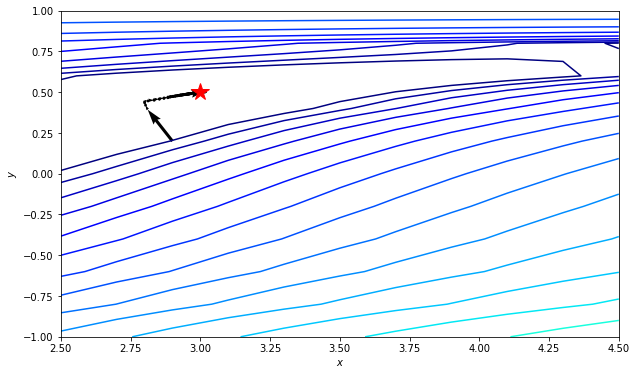

In [78]:
init=np.array([[2.9],[.2]])#
path2,fvs=backtrack(f=func,iterx=init,grad=grad,maxstep=120,t=1,verbose=False,debug=True)
path=path2
# plot2
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

In [84]:
grad

array([[1.],
       [1.]])

In [21]:
    def momentum(f,iterx,maxstep=400,t=0.1,verbose=False,gamma=0.9,rate=5,threshold=1e-2,debug=False,forget=False):
        path_=[]
        fvs=[]
        step=0
        v=0
        zv,grad=f(iterx)
        while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):
            path_.append(iterx)
            lastGrad=grad
            zv,grad=func(iterx)

            # print(np.dot(np.transpose(grad),lastGrad))

            
            learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
            if forget and np.dot(np.transpose(grad),lastGrad)<0:
                # print(step)
                # print(grad)
                # print(lastGrad)
                gamma*=0.9
                v=gamma*v+learning_rate*grad
            else:
                v=gamma*v+learning_rate*grad
            fvs.append(zv)
            
            if debug and len(grad[abs(grad)<threshold])>1:
                learning_rate*=learning_rate*rate
            # if step%100==0:
            #     pass
            #     print(learning_rate)
            iterx=iterx-v
            step+=1
        print(iterx)
        print(func(iterx))
        print(step)
        path=np.array(path_).T
        path=path[0]
        return path,fvs

[[ 0.12698948]
 [-2.42729575]]
(array([9.84256309]), array([[-0.07646922],
       [-0.20838639]]))
30


[]

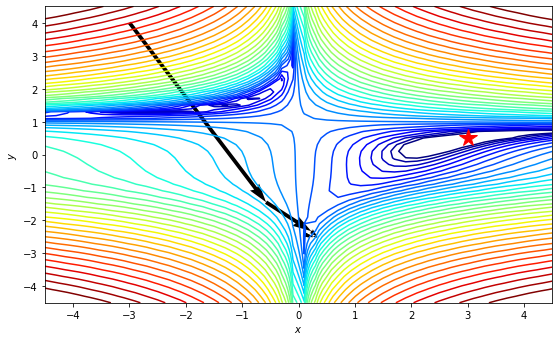

In [14]:
init=np.array([[-3],[4]])#np.array([[-3.9],[1.2]])#
limit=0.2

path2,fvs=momentum(f=func,iterx=init,grad=grad,maxstep=30,gamma=0.2,t=0.1,verbose=False,debug=False,forget=False)#True)
path=path2

# plot whole


xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

fig = plt.figure(figsize=(20, 12))
ax=plt.subplot(2,2,1)

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.plot()

[]

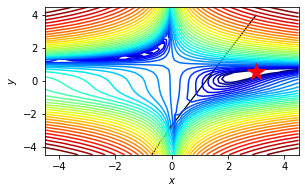

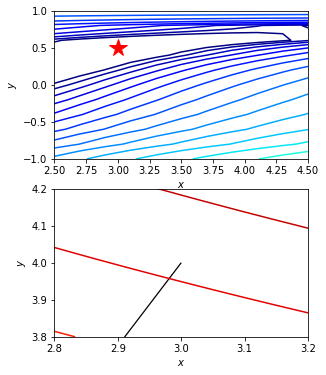

In [120]:

# plot whole


xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(2,2,1)

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.plot()

xmin, xmax, xstep = 2.5, 4.5, .2
ymin, ymax, ystep = -1, 1, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(2,2,2)

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))



xmin, xmax, xstep = init[0][0]-limit, init[0][0]+limit, .002
ymin, ymax, ystep = init[1][0]-limit, init[1][0]+limit, .002
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

ax=plt.subplot(2,2,4)
#fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

[[-4.61304221]
 [ 1.18248122]]
(array([0.75515347]), array([[ 0.06034495],
       [-0.01531747]]))
150


[]

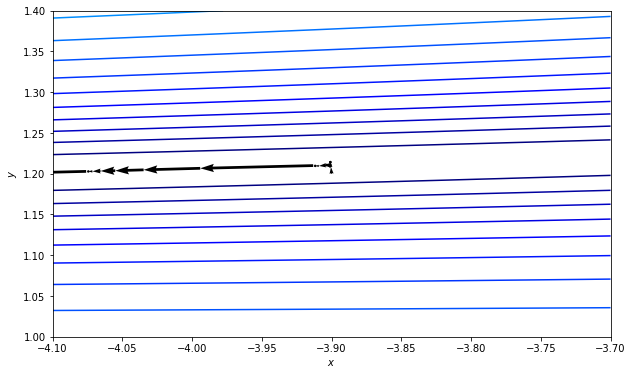

In [109]:
path2,fvs=momentum(f=func,iterx=init,grad=grad,maxstep=150,gamma=0.5,t=1,verbose=False,debug=False,forget=False)
path=path2
# plot2
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

[[2.98127887]
 [0.49514125]]
(array([5.80124499e-05]), array([[-0.00414024],
       [-0.00810935]]))


[]

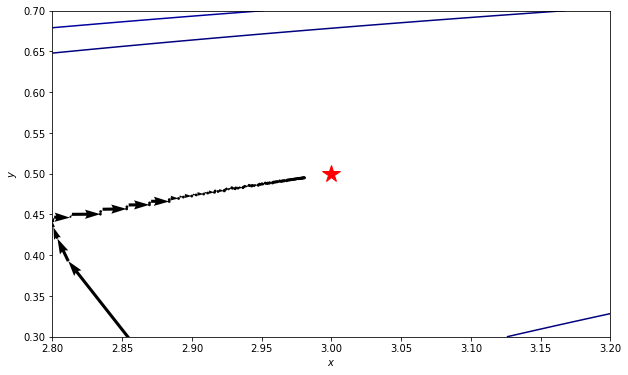

In [46]:
path2,fvs=backtrack(f=func,iterx=init,grad=grad,maxstep=120,t=1,verbose=False,debug=False)
path=path2
# plot2
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

## evaluation

In [30]:
def momentum(f,iterx,maxstep=400,t=0.1,verbose=False,gamma=0.9,rate=5,threshold=1e-2,debug=False,forget=False):
    path_=[]
    
    step=0
    v=0
    zv,grad=f(iterx)
    while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):
        path_.append(iterx)
        lastGrad=grad
        zv,grad=func(iterx)

        # print(np.dot(np.transpose(grad),lastGrad))

        
        learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
        if forget and np.dot(np.transpose(grad),lastGrad)<0:
            # print(step)
            # print(grad)
            # print(lastGrad)
            gamma*=0.9
            v=gamma*v+learning_rate*grad
        else:
            v=gamma*v+learning_rate*grad
        
        if debug and len(grad[abs(grad)<threshold])>1:
            learning_rate*=learning_rate*rate
        # if step%100==0:
        #     pass
        #     print(learning_rate)
        iterx=iterx-v
        step+=1
    # print(iterx)
    # print(func(iterx))
    # print(step)
    path=np.array(path_).T
    path=path[0]
    return path,fvs,step,zv

In [31]:
    def backtrack(f,iterx,grad,maxstep=400,t=0.1,verbose=False):
        path_=[]
        step=0
        while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):
            path_.append(iterx)

            zv,grad=func(iterx)
            learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
            # if step%100==0:
            #     pass
            #     print(learning_rate)
            iterx=iterx-learning_rate*grad
            step+=1
        # print(grad)
        # print('step: '+str(step))
        path=np.array(path_).T
        path=path[0]
        return path,step,zv

In [33]:
import datetime
path1=[]
path2=[]
path3=[]
interval1=datetime.timedelta(0)
interval2=datetime.timedelta(0)
interval3=datetime.timedelta(0)

step1=0
step2=0
step3=0

diverge1=0
diverge2=0
diverge3=0

local1=0
local2=0
local3=0

maxStep=120

for i in range(30):
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#



    # # momentum forget
    # start = datetime.datetime.now()
    # for repeat in range(1):
    #     path1,fvs,step=momentum_forget(f=func,iterx=init,maxstep=maxStep,gamma=0.2,t=1,verbose=False,debug=False,forget=True)
    #     # print(step)
    # end = datetime.datetime.now()

    # interval = end - start
    # # print(interval)
    # interval1+=interval
    # step1+=step
    # if step>maxStep:
    #     # print('mf diverge')
    #     diverge1+=1

    # momentum
    start = datetime.datetime.now()
    for repeat in range(1):
        path2,fvs,step,zv=momentum(f=func,iterx=init,maxstep=maxStep,gamma=0.5,t=1,verbose=False,debug=False,forget=False)
        # print(step)
    end = datetime.datetime.now()

    interval = end - start
    # print(interval)

    interval2+=interval
    step2+=step
    if zv>1e-3 and zv<1:#step>=maxStep:
        local2+=1

    elif zv>=1:
        diverge2+=1
    # backtracking line
    fv,grad=func(init)
    start = datetime.datetime.now()
    for repeat in range(1):
        
        path3,step,zv=backtrack(f=func,iterx=init,grad=grad,maxstep=maxStep,t=1,verbose=False)
        # print(step)
    end = datetime.datetime.now()

    interval = end - start
    # print(interval)
    interval3+=interval
    step3+=step
    if zv>1e-3 and zv<1:#step>=maxStep:
        local3+=1

    elif zv>=1:
        diverge3+=1
        print('bk diverge')
    print('*****************************')


    


[[3.00013419]
 [0.50003593]]
(array([3.04492672e-09]), array([[1.25121993e-05],
       [1.22749201e-04]]))
120
*****************************
[[2.9991593 ]
 [0.49979168]]
(array([1.13235456e-07]), array([[-2.72031973e-04],
       [ 1.01826921e-05]]))
120
*****************************
[[-3.41319127]
 [ 1.23546888]]
(array([0.84908616]), array([[0.09938072],
       [0.05348566]]))
120
*****************************
[[3.00012377]
 [0.50003336]]
(array([2.61575241e-09]), array([[9.09999265e-06],
       [1.23066168e-04]]))
120
*****************************
[[4.30520301]
 [0.69974192]]
(array([0.08785878]), array([[ 0.09133503],
       [-0.1734238 ]]))
120
*****************************
[[2.99629542]
 [0.49913486]]
(array([2.27485273e-06]), array([[-0.00181975],
       [ 0.00251916]]))
120
*****************************
[[2.99973675]
 [0.49993484]]
(array([1.10960877e-08]), array([[-8.57334843e-05],
       [ 5.74051442e-06]]))
120
*****************************
[[3.00015253]
 [0.50004197]]
(array

In [34]:
print(interval1/30)
print(interval2/30)
print(interval3/30)

print(step1/30)
print(step2/30)
print(step3/30)

print(diverge1)
print(diverge2)
print(diverge3)

print(local1)
print(local2)
print(local3)

0:00:00
0:00:01.917951
0:00:01.752487
0.0
120.0
120.0
0
3
9
0
10
3


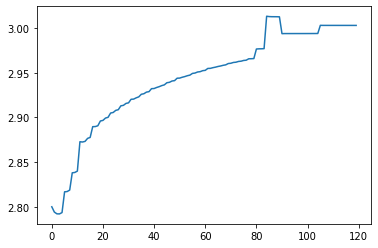

In [41]:
plt.plot(path[0])
# plt.plot(path[1])

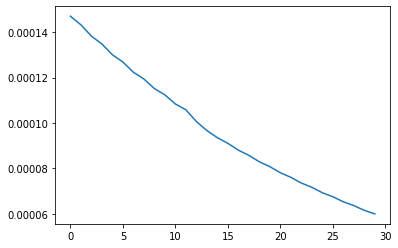

In [49]:
np.transpose(path)[-10:]
plt.plot(fvs[-30:])

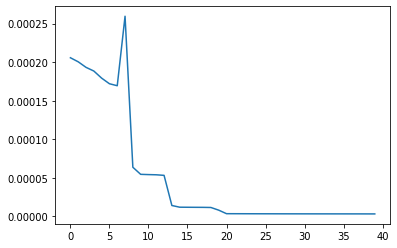

In [53]:
plt.plot(fvs[-40:])

In [121]:
func(np.transpose(path)[-1])

(0.0008455754446869152, array([-0.0207889 , -0.01644613]))

In [120]:
init

array([[3.],
       [4.]])

In [128]:
foo = np.array([-3.869, 1.212])
f(*foo)

0.8072899832340175

[[0.63348667]
 [0.25489783]]


(9.715701744037013, array([0.3734831 , 0.27320827]))

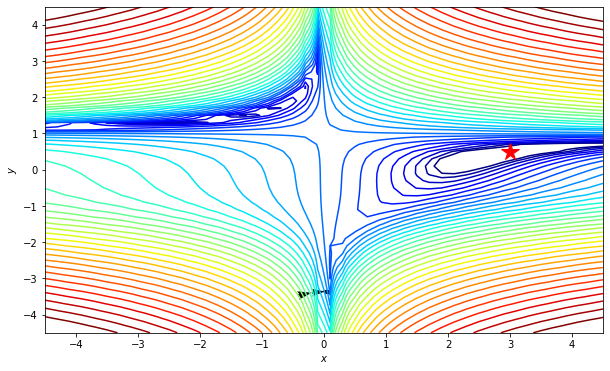

In [133]:
init=np.array([[-0.418], [-3.471]])
fv,grad=func(init)
path2=backtrack(f=func,iterx=init,grad=grad,maxstep=100,t=1,verbose=False)
path=path2
# plot2
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()


foo = np.array([0.049, -3.44])
# f(*foo)

func(np.transpose(foo))

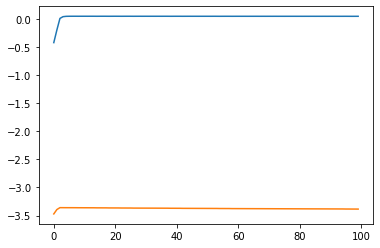

In [135]:
plt.plot(path[0])
plt.plot(path[1])


In [132]:
foo = np.array([-2.619, 1.293])
# f(*foo)

func(np.transpose(foo))

(0.9515716910282389, array([0.1183025 , 0.48757274]))